In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Blood Cell Count

* RBCs — red blood cells
* WBCs — white blood cells

In [2]:
def detect_and_count_blood_cells(img):
    img_copy = img.copy()
    blur = cv2.GaussianBlur(img, (17,17), 0)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobelx_scale = cv2.convertScaleAbs(sobelx)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobely_scale = cv2.convertScaleAbs(sobely)
    
    grade_weighted = cv2.addWeighted(sobelx_scale, 0.5, sobely_scale, 0.5, 0)
    
    plt.axis('off')
    plt.imshow(cv2.cvtColor(grade_weighted, cv2.COLOR_GRAY2RGB))
    plt.figure()
    
    rows = grade_weighted.shape[0]
    rbcs = cv2.HoughCircles(grade_weighted, cv2.HOUGH_GRADIENT, 1, rows / 15,
                            param1=100, param2=30, minRadius=23, maxRadius=50)

    grade_weighted_without_rbcs = grade_weighted.copy()
    
    if rbcs is not None:
        rbcs = np.uint16(np.around(rbcs))
        for i in rbcs[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(img_copy, center, 1, (0, 0, 255), 3)
            # circle outline
            radius = i[2]
            cv2.circle(img_copy, center, radius, (0, 255, 0), 3)
            # fill rbc
            cv2.circle(grade_weighted_without_rbcs, center, (radius // 2) + 10, (0, 0, 0), radius)
            
    print('RBC count: %i' % (0 if rbcs is None else rbcs.shape[1]))
    
    
    rows = grade_weighted_without_rbcs.shape[0]
    wbcs = cv2.HoughCircles(grade_weighted_without_rbcs, cv2.HOUGH_GRADIENT, 1, rows / 15, 
                            param1=100, param2=30, minRadius=51, maxRadius=80)

    if wbcs is not None:
        wbcs = np.uint16(np.around(wbcs))
        for i in wbcs[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(img_copy, center, 1, (0, 0, 255), 3)
            # circle outline
            radius = i[2]
            cv2.circle(img_copy, center, radius, (255, 0, 0), 3)
    
    print('WBC count: %i' % (0 if wbcs is None else wbcs.shape[1]))
    
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

RBC count: 41
WBC count: 1


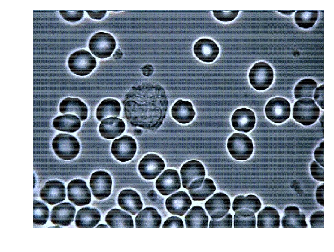

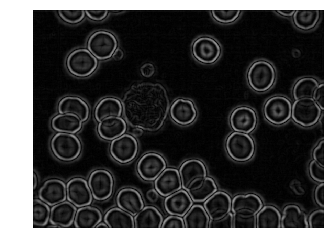

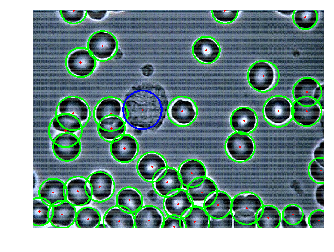

In [3]:
img = cv2.imread('images/1.jpg')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.figure()

detect_and_count_blood_cells(img)

RBC count: 13
WBC count: 0


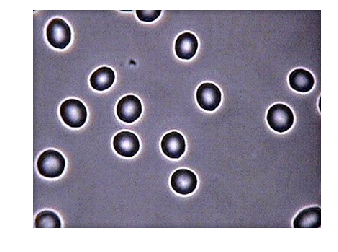

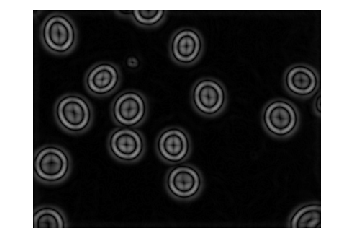

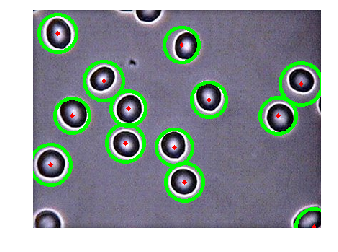

In [4]:
img = cv2.imread('images/2.jpg')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.figure()

detect_and_count_blood_cells(img)